In [10]:
import numpy as np 
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import os
import shutil
from tensorflow.keras import metrics
import matplotlib
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop




# Start with just one image
1. upload image
2. create duplicate image with lines
3. build model and try to run with one image

In [ ]:
# #read in one image as target (or y)
# y = np.array(Image.open('Data/Unruled/sc0181_NEW.jpg'))
# #show image from array
# Image.fromarray(y)

In [ ]:
#y.shape

In [ ]:
#2. create lines on target image

# X = np.array(y)
# #[row_start:row_stop: row_step, col_start:col_stop:col_step ] 
# X[::40+np.random.randint(-2,2),:] = 80+np.random.randint(-60, 130)
# #show new image from array
# Image.fromarray(X)


In [6]:
image_to_predict = np.array(Image.open('Data/Original_Ruled/IMG_0002.jpg'))

In [4]:
# fig, axs = matplotlib.pyplot.subplots(1,2, figsize = (10,10))
# [ax.imshow(x) for ax, x in zip(axs.flatten(), [X, y])];


In [5]:
#reshape to fit into model
# X = X.reshape(*X.shape,1)
# X.shape

# Bring in entire data set

In [3]:
# #y
# y_list = []
# for image in os.listdir('Data/y_variables/Unruled'):
#     file='Data/y_variables/Unruled/'+ str(image)
#     y_image = np.array(Image.open(file))
#     y_image = y_image.reshape(*y_image.shape,1)
#     y_list.append(y_image)
                  
# y = np.array(y_list)  
# y.shape

(669, 500, 400, 1)

In [36]:
#y ONLY 10 IMAGES
y_list = []
for image in os.listdir('Data/y_variables/Unruled'):
    file='Data/y_variables/Unruled/'+ str(image)
    y_image = np.array(Image.open(file))
    y_image = y_image.reshape(*y_image.shape, 1)
    y_list.append(y_image)
    if len(y_list) == 10:
        break
                  
y = np.array(y_list)  
y.shape

(10, 500, 400, 1)

In [3]:
# #X

# X_list = []
# for image in os.listdir('Data/X_variables/computer_generated_lines'):
    
#     file = 'Data/X_variables/computer_generated_lines/'+str(image)
#     X_image = np.array(Image.open(file))
#     X_image = X_image.reshape(*X_image.shape,1)
#     X_list.append(X_image)
    
# X = np.array(X_list)
# X.shape

In [35]:
#X FIRST 10 IMAGES

X_list = []
for image in os.listdir('Data/X_variables/computer_generated_lines'):
    
    file = 'Data/X_variables/computer_generated_lines/'+str(image)
    X_image = np.array(Image.open(file))
    X_image = X_image.reshape(*X_image.shape, 1)
    X_list.append(X_image)
    if len(X_list) == 10:
        break
    
X = np.array(X_list)
X.shape

(10, 500, 400, 1)

In [8]:
tf.__version__

'2.3.0'

# 3 SELECTIONAL AUTOENCODER model
Selectional Auto-Encoder (SAE)
The hierarchy of layers of our SAE consists of a series of convolutional plus pooling layers, until an intermediate layer in which meaningful representations of the input are attained. As these layers are applied, filters are able to relate parts of the image that were initially far apart. It then follows a series of convolutional plus upsampling layers that reconstruct the image up to the same 200 input size. The last layer consists of a set of neurons with sigmoid activation that predict a value in the range of [0, 1], depending on the selectional level for the corresponding input feature. 

200 epochs maximum
patience = 5
used grid search to tune hyper parameters?
batch size = 8
results + F measure (F score?)



In [15]:
# input_img = image_to_predict.reshape(*image_to_predict.shape,1)# adapt this if using `channels_first` image data format
# input_img.shape


NameError: name 'imput_img' is not defined

In [ ]:
# input_img = Input(shape=(1,500,400)) 

# x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)

# # at this point the representation is (4, 4, 8) i.e. 128-dimensional

# x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), activation='relu')(x)
# x = UpSampling2D((2, 2))(x)

# x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), activation='relu')(x)
# x = UpSampling2D((2, 2))(x)

# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder = Model(input_img, decoded)
# autoencoder.summary()



In [37]:
# #3.build the model


input_img = Input(shape=(500,400,1)) 

x = Conv2D(16, (3, 3), activation='relu')(input_img)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)

#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(8, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2DTranspose(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)

decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()



Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 500, 400, 1)]     0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 498, 398, 16)      160       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 496, 396, 8)       1160      
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 494, 394, 8)       584       
_________________________________________________________________
conv2d_transpose_40 (Conv2DT (None, 496, 396, 8)       584       
_________________________________________________________________
conv2d_transpose_41 (Conv2DT (None, 498, 398, 16)      1168      
_________________________________________________________________
conv2d_transpose_42 (Conv2DT (None, 500, 400, 1)     

In [16]:
type(Input)

function

In [38]:
#4 compile your model

METRICS = [ metrics.CategoricalAccuracy(name='ACCURACY'),
            metrics.AUC(name='AUC',curve='pr', multi_label=False),
           metrics.SensitivityAtSpecificity(0.5, name='Sens@Spec'),
           metrics.SpecificityAtSensitivity(0.5, name='Spec@Sens')]
# new tensorflow
# METRICS = [ metrics.Accuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC')]


autoencoder.compile(optimizer='adam', loss='mse')
# original copy autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
#model.compile(loss = 'mse', optimizer = 'adam', metrics=METRICS)


In [39]:
#5 set up tensorboard

#updated tensorboard
# checkpoint_filepath = './tmp/checkpoint'
# tensorboard = TensorBoard(log_dir="./logs",
#     histogram_freq=2,
#     write_graph=True,
#     write_images=True,
#     update_freq="epoch",
#     profile_batch=2,
#     embeddings_freq=0,
#     embeddings_metadata=None)


#old version
# checkpoint_filepath = './tmp/checkpoint'
# tensorboard = TensorBoard(log_dir="./logs",
#     write_graph=True,
#     write_images=True)

# updated tensorboard
# early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
# model_cp = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True)


#old version
#model_cp = ModelCheckpoint(filepath=checkpoint_filepath)
early_stopping = EarlyStopping(monitor='loss',patience=10)

In [43]:
# for X in X_list:
#     for y in y_list:

#         model.fit(x=np.array([X]), y=np.array([y]), epochs = 500, verbose=1, callbacks=[tensorboard, early_stopping,  model_cp])

# model.fit(x=X, y=y, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping,  model_cp])
history = autoencoder.fit(x=X, y=y, epochs = 10, verbose=1, callbacks=[early_stopping])


Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 55491.4141
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 55491.3750
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 55491.3516
Epoch 4/10
1/1 [==============================] - 0s 990us/step - loss: 55491.3047
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 55491.2734
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 55491.2383
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 55491.2109
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 55491.1758
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 55491.1367
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 55491.1055


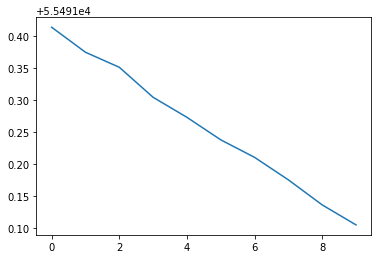

In [45]:
plt.plot(history.history['loss'])

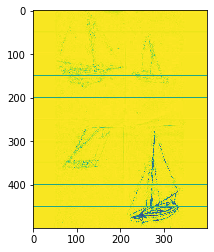

In [48]:
plt.imshow(X[0,:,:,:].reshape(500,400))

In [ ]:
# result = model.predict(np.array([X]))
result = model.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [ ]:
input_img = Input(shape=input_shape)
x = Conv2D(256, 2, activation="swish", padding="same")(input_img)
x = BatchNormalization()(x)
x = Conv2D(128, 1, activation="swish", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, padding="same")(x) 
x = Conv2D(64, 1, activation="linear", padding="same")(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D(2, padding="same")(x) 
x = Conv2D(64, 1, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
# x = UpSampling2D(2)(x)
# x = Dropout(0.5)(x)
x = Conv2D(128, 1, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D(2)(x)
x = Conv2D(256, 2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
decoded = Conv2D(1, 1, activation="linear", padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()

In [ ]:
#next(X_train_generator).shape

In [ ]:
#type(X_train_generator)

In [ ]:
#!tensorboard --logdir=logs


In [ ]:
#to create all images with random line widths and depth - only need to do once

# for image in os.listdir('Data/Unruled'):

#     y=np.array((Image.open(f'Data/Unruled/{image}')))
#     X = np.array(y)
#     X[::40+np.random.randint(-20,20),:] = 80+np.random.randint(-60, 130)
#     pil_X = Image.fromarray(X)
#     pil_X.save(f'Data/computer_generated_lines/lined_{image}')
